## Look at the big picture
1. Aims: Classify any new diamond in the three categories (Low, Mid and High grade).
2. Performance measure: confusion matrix



## Get the data

### Import the packages and the data

In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
from pathlib import Path
# Read the CSV file
df = pd.read_csv(
    '/Users/sean/OneDrive - connect.hku.hk/ECOM7126/Assignment/Code/Machine-Learning-7126/Dataset/SpamDataset.csv')

# extra code – code to save the figures as high-res PNGs for the book

IMAGES_PATH = Path() / "images" / "assignment4"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



### Take a Quick Look at the Data Structure

In [23]:
# get a glance of the data
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.000,0.897,1.157,0.0,0.127,0.000,0.000,0.127,0.257,0.127,...,0.0,0.192,0.0,0.377,0.068,0.000,2.885,87,478,1
1,0.893,0.000,0.000,0.0,0.000,0.000,0.893,0.000,0.000,0.000,...,0.0,0.000,0.0,0.557,0.000,0.000,2.811,16,59,1
2,0.000,0.549,0.549,0.0,1.099,0.549,2.189,0.000,0.000,0.549,...,0.0,0.166,0.0,0.480,0.000,0.087,15.089,151,381,1
3,0.000,0.000,0.367,0.0,1.107,0.737,0.000,2.957,0.000,2.957,...,0.0,0.146,0.0,1.093,0.000,0.000,5.157,105,287,1
4,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.274,0.0,0.140,0.000,0.000,2.756,8,25,0


In [24]:
# get the info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

In [25]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [26]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104627,0.213073,0.280670,0.065441,0.312123,0.095835,0.114285,0.105345,0.090105,0.239524,...,0.038547,0.139149,0.016949,0.269102,0.075834,0.044256,5.191111,52.183696,283.305435,0.393913
std,0.305417,1.290788,0.504258,1.395401,0.672530,0.273839,0.391530,0.401039,0.278590,0.644856,...,0.243350,0.270379,0.109342,0.815809,0.245993,0.429307,31.732934,194.909998,606.419489,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.004000,-0.004000,-0.007000,-0.008000,-0.005000,-0.004000,0.990000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.587750,6.000000,34.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064000,0.000000,0.000000,0.000000,0.000000,2.273500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.421000,0.000000,0.384000,0.000000,0.000000,0.000000,0.000000,0.161000,...,0.000000,0.188000,0.000000,0.316000,0.052000,0.000000,3.706250,43.000000,266.250000,1.000000
max,4.538000,14.289000,5.092000,42.814000,9.998000,5.889000,7.278000,11.102000,5.258000,18.171000,...,4.390000,9.742000,4.083000,32.479000,6.009000,19.829000,1102.500000,9984.000000,15840.000000,1.000000


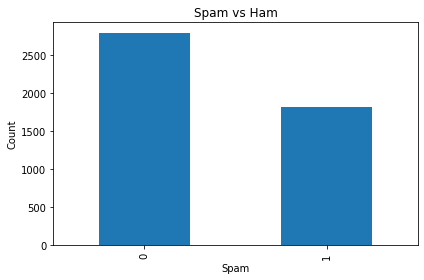

In [27]:
# plot the spam 
df['spam'].value_counts().plot(kind='bar')
plt.title('Spam vs Ham')
plt.xlabel('Spam')
plt.ylabel('Count')
save_fig('spam_vs_ham')
plt.show()

## Do Neural Network

In [28]:
# Random sampling
from sklearn.model_selection import train_test_split
# we have to split the data into train, test and validation set

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

train_set,vali_set = train_test_split(train_set, test_size=0.2, random_state=42)



from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

# get the label and the features
y_train = train_set['spam']
X_train = train_set.drop("spam", axis=1)
y_test = test_set["spam"]
X_test = test_set.drop("spam", axis=1)
X_val = vali_set.drop("spam", axis=1)
y_val = vali_set['spam']






              precision    recall  f1-score   support

           0       0.96      0.96      0.96       560
           1       0.93      0.94      0.93       360

    accuracy                           0.95       920
   macro avg       0.94      0.95      0.95       920
weighted avg       0.95      0.95      0.95       920

No Skill: ROC AUC=0.500
Neural Network: ROC AUC=0.982


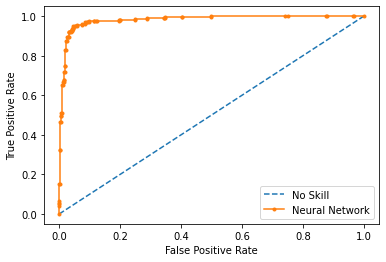

In [29]:
# use the pipeline to preprocess the data
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

# use the nerual network to train the model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
mlp.fit(X_train, y_train)

# get the accuracy of the model
from sklearn.metrics import accuracy_score
y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)

# use the confusion matrix to get the precision and recall
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

# use the classification report to get the precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# use the ROC curve to get the AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Neural Network: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Neural Network')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [100]:
import os
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from keras import optimizers
from keras.models import Sequential
from keras.callbacks import History, ReduceLROnPlateau

# define the neural network
model = models.Sequential()
# use L1 regularization to avoid overfitting
model.add(layers.Dense(64, activation='relu', kernel_regularizer='l2', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))




#Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

#Evaluate model
model.evaluate(X_test, y_test)

#Make predictions
predictions = model.predict(X_test)



Train on 2944 samples, validate on 736 samples
Epoch 1/30
2944/2944 [==============================] - 0s 119us/step - loss: 0.8761 - accuracy: 0.8431 - val_loss: 17.3611 - val_accuracy: 0.4307
Epoch 2/30
2944/2944 [==============================] - 0s 42us/step - loss: 0.5562 - accuracy: 0.9113 - val_loss: 19.4714 - val_accuracy: 0.4334
Epoch 3/30
2944/2944 [==============================] - 0s 38us/step - loss: 0.4228 - accuracy: 0.9192 - val_loss: 22.8453 - val_accuracy: 0.4361
Epoch 4/30
2944/2944 [==============================] - 0s 36us/step - loss: 0.3453 - accuracy: 0.9276 - val_loss: 20.5698 - val_accuracy: 0.4457
Epoch 5/30
2944/2944 [==============================] - 0s 36us/step - loss: 0.3002 - accuracy: 0.9310 - val_loss: 19.8766 - val_accuracy: 0.4484
Epoch 6/30
2944/2944 [==============================] - 0s 38us/step - loss: 0.2748 - accuracy: 0.9341 - val_loss: 15.5720 - val_accuracy: 0.4606
Epoch 7/30
2944/2944 [==============================] - 0s 37us/step - loss:

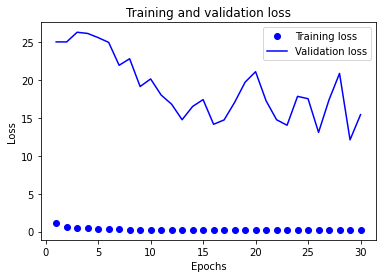

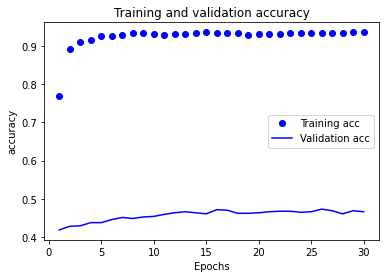

In [97]:
# plot the validation loss and accuracy
import matplotlib.pyplot as plt
history = model.history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the training and validation accuracy
plt.clf()
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

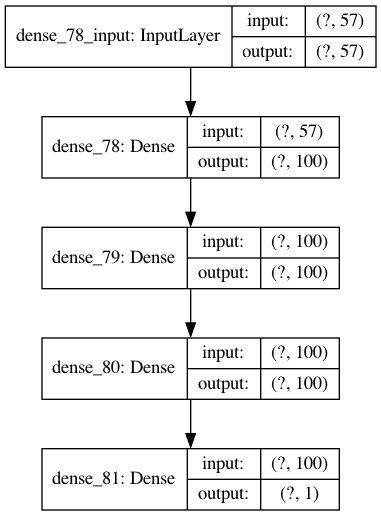

In [72]:

from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model.png')
plot_model(model, to_file='model_test.png', show_shapes=True, show_layer_names=True)






In [73]:
# Using Visualkeras to Visualize the Neural Network
import visualkeras
#visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='model.png') # write to disk
